# DATA PREPROCESSING
### Dataset Features ($x_i$)
The dataset provides the following clinical observations:
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)

### Target Variable ($y$)
* **Stage**: Histologic stage of disease (1, 2, 3, or 4)

### Machine Learning Workflow
In this initial module (`01_EDA_and_Preprocessing`), we focus exclusively on laying the groundwork for the Supervised Learning pipeline. Before attempting any predictive modeling, we must ensure data quality and understand the biological signals.

**Workflow for this module:**

1.  **Data Preparation & Cleaning:**
    * Handling missing values (strategies for imputation or removal).
    * Encoding categorical inputs (e.g., converting `Sex`, `Edema` to numeric formats).

2.  **Exploratory Data Analysis (EDA):**
    * **Correlation Analysis:** Investigating how key clinical markers (e.g., `Bilirubin`, `Copper`) correlate with the disease `Stage`.
    * **Class Separability:** Using visual inspection (Box Plots, Bar Charts) to determine which features effectively distinguish between early-stage (1-2) and late-stage (3-4) cirrhosis.
    * **Imbalance Handling:** analyzing the class distribution to strategize for future model training.

*(Note: Model Training and Advanced Feature Selection will be conducted in the next module, `02_Feature_Selection_and_Modeling`).*

In [1]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn scipy -q

In [2]:
#IMPORT ALL THE LIBRARIES USEFUL FOR THE FURTHER STEPS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder


## 1. Data Cleaning & Preparation

In [3]:
data=pd.read_csv('../data/cirrhosis.csv')

In [4]:
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [5]:
print("Let's check if there are missing values in the dataset:")
print(data.isnull().sum()) #check if there are null or NaN values and how many of them.

Let's check if there are missing values in the dataset:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


### In our dataset there are a lot of missing values. We have to remove these, because can cause problems during the analysis.

In [6]:
data_refined=data.dropna().copy() #remove samples with NaN values.
print("Removed",data.shape[0]-data_refined.shape[0],"samples containing missing values.", data_refined.shape[0],"remaining samples")

Removed 142 samples containing missing values. 276 remaining samples


### Now we have to check the type of the feature value contained in our dataset and the range of the numerical values.

In [7]:
print(data_refined.dtypes)
#here we divide the features in numerical features, and categorical ones.
numerical_cols=data_refined.select_dtypes(include=['int64','float64']).columns.tolist()  
categorical_cols = data_refined.select_dtypes(include=['object']).columns.tolist()
#here we watch the range of values to understand if the range is comparable or not.
data_refined[numerical_cols].describe().loc[['min','max']]

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
min,1.0,41.0,9598.0,0.3,120.0,1.96,4.0,289.0,28.38,33.0,62.0,9.0,1.0
max,312.0,4556.0,28650.0,28.0,1775.0,4.40,588.0,13862.4,457.25,598.0,563.0,17.1,4.0


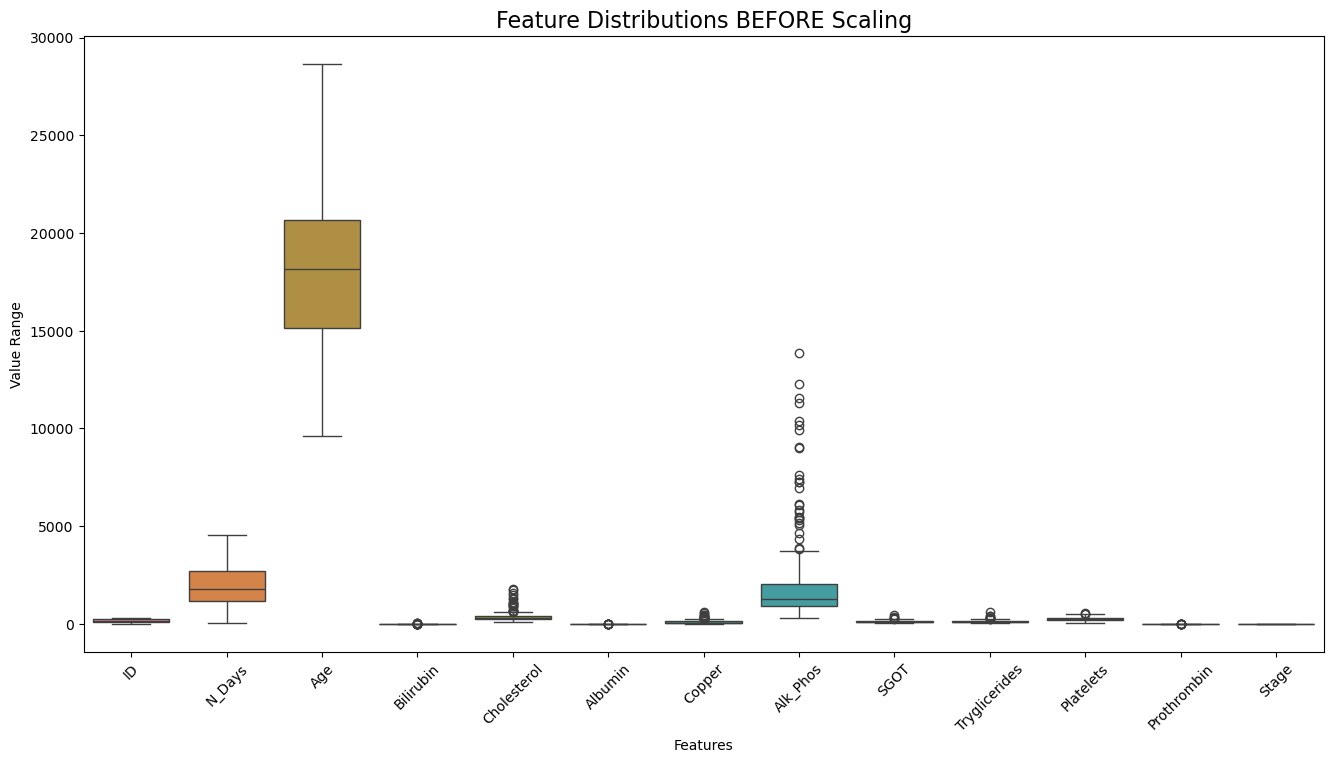

In [8]:
plt.figure(figsize=(16, 8))

# here we draw the boxplot to understand if the range of value is comparable or not visibly. 
sns.boxplot(data=data_refined[numerical_cols])

plt.title("Feature Distributions BEFORE Scaling", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Value Range")
plt.xticks(rotation=45)
plt.savefig('../figures/01_boxplot_before_scaling.svg')
plt.show()

Actually, working with `object` (string) data types is very hard during machine learning tasks because algorithms operate on mathematical equations and vector spaces. They cannot compute distances or gradients on text labels like "Male"/"Female" or "Placebo"/"Drug".
To make this data usable, we must **encode** these values into numerical labels (e.g., $0, 1, 2...$), transforming them into a format that the model can mathematically process.
In addiction,  our dataset, features vary wildly in magnitude:
* `Bilirubin` ranges from roughly 0.3 to 28.
* `Age` is measured in days, reaching values over 25,000.
If we feed these raw values into a model, features with larger ranges (like Age) will dominate the cost function, effectively "drowning out" important but smaller features like Bilirubin.
From a theoretical standpoint (as seen in the **Gradient Descent** lectures), unscaled data creates a distorted, elongated Cost Function "valley." The optimization algorithm will struggle, oscillating back and forth (zig-zagging) and taking a long time to converge.
By applying **Feature Scaling** (Standardization), we ensure all features have a mean of $\mu=0$ and standard deviation $\sigma=1$. This makes the cost function spherical, allowing Gradient Descent to converge directly and efficiently to the global minimum.

WARNING: Stage is a float64 value, but we shouldn't normalize that value, because it is already an encoding to classify the 4 different stadies of the illness.

In [9]:
# encoding of the categorical variables
le = LabelEncoder()
categorical_cols = data_refined.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    data_refined[col] = le.fit_transform(data_refined[col])

# feature scaling to bring features onto the same scale
scaler = StandardScaler()

col_to_normalize=[]
for col in numerical_cols:
    if col != 'Stage':
        col_to_normalize.append(col)
data_refined[col_to_normalize] = scaler.fit_transform(data_refined[col_to_normalize])

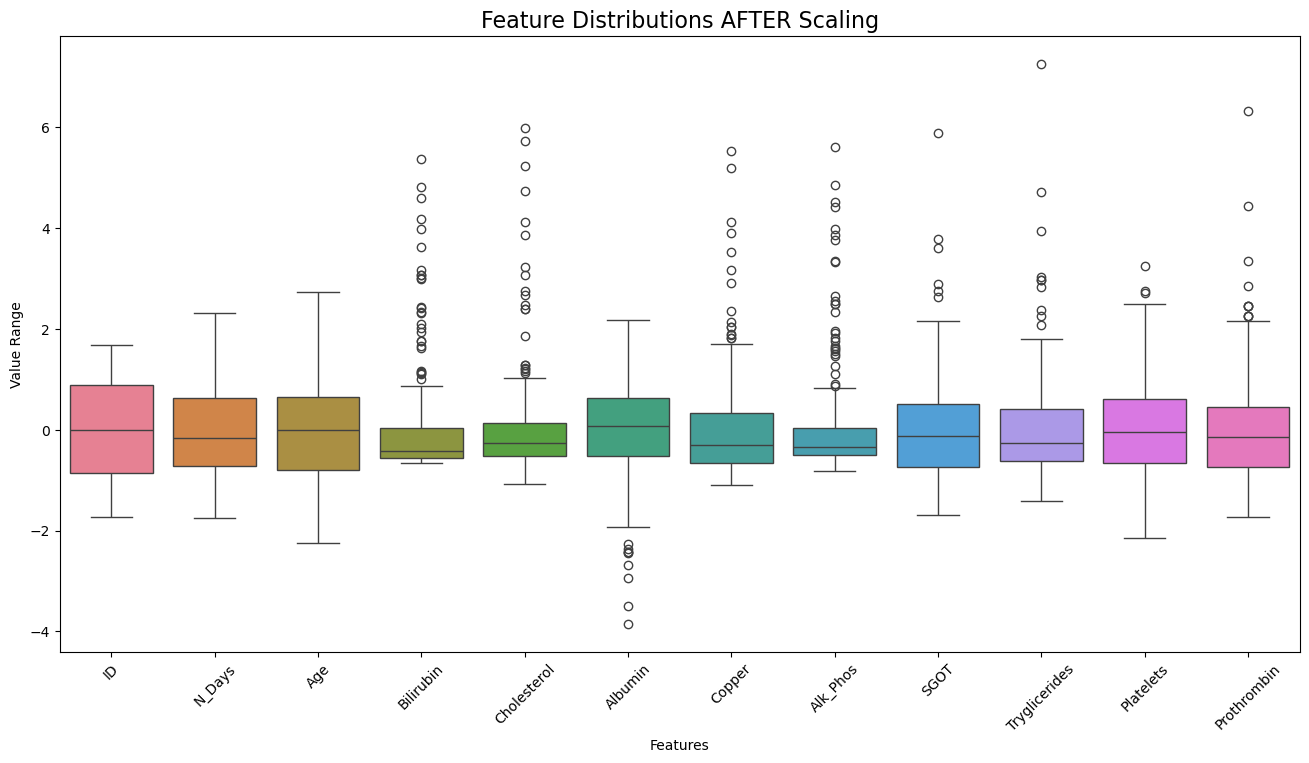

In [10]:
plt.figure(figsize=(16, 8))

#  we draw the boxplot to understand if the range of value is comparable after scaling. 
sns.boxplot(data=data_refined[col_to_normalize])

plt.title("Feature Distributions AFTER Scaling", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Value Range")
plt.xticks(rotation=45)
plt.savefig('../figures/01_boxplot_after_scaling.svg')
plt.show()

## 2. EDA (Exploratory Data Analysis)

Before training any model, it is essential to "see" the data to understand which features best distinguish between the different stages of the disease. Following the standard Machine Learning workflow, this phase focuses on three key aspects:

### 2.1 Target Distribution
We analyze the balance of the dataset by counting the number of patients in each **Stage** (1, 2, 3, 4).
* **Goal:** Determine if the dataset is balanced. If one stage is rare (e.g., Stage 4), the model might struggle to learn it correctly, leading to biased predictions.


Distribution value:
       Counts  Percentage
Stage                    
1.0        12    4.347826
2.0        59   21.376812
3.0       111   40.217391
4.0        94   34.057971


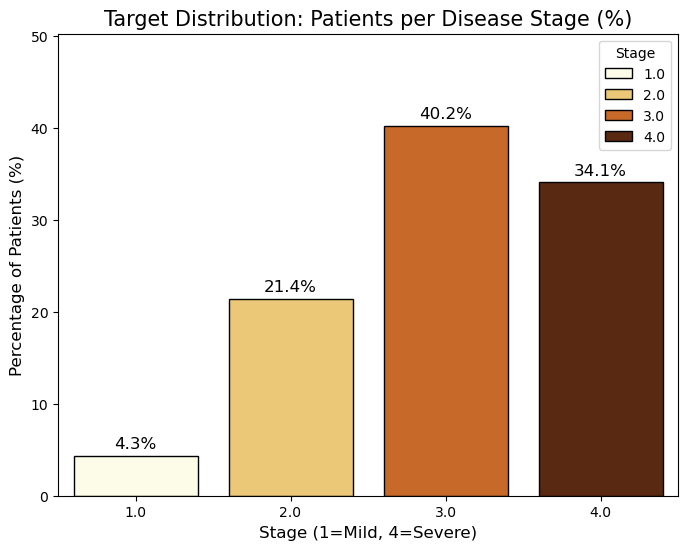

In [11]:
stage_counts = data_refined['Stage'].value_counts().sort_index() # calculate absolute frequency for each stage
stage_props = data_refined['Stage'].value_counts(normalize=True).sort_index() * 100 # calculate relative percentage to handle class imbalance

data_refinded_summary = pd.DataFrame({ 'Counts': stage_counts, 'Percentage':stage_props}) # create a summary dataframe to inspect the distribution before plotting

print("Distribution value:")
print(data_refinded_summary)

# plotting the percentages using a barplot to visualize the class imbalance
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Stage', y='Percentage', data=data_refinded_summary, hue='Stage', legend=True, palette='YlOrBr', edgecolor='black')

# adding precise percentage labels on top of the bars
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.1f%%', padding=3, fontsize=12);

# setting titles and axis labels
plt.title('Target Distribution: Patients per Disease Stage (%)', fontsize=15)
plt.xlabel('Stage (1=Mild, 4=Severe)', fontsize=12)
plt.ylabel('Percentage of Patients (%)', fontsize=12)

# extending y-axis limit to prevent labels from being cut off and save the figure
plt.ylim(0, data_refinded_summary['Percentage'].max() + 10)
plt.savefig('../figures/01_patients_percentage_per_stage.svg')
plt.show()


**Observation:**
The bar plot reveals a distinct **Class Imbalance**. The intermediate/advanced stages (typically Stage 3 and 4) are over-represented compared to the early stages (Stage 1 and 2).

**Is this expected?**
Yes. In clinical datasets, this phenomenon is common due to **Selection Bias**: patients are typically enrolled in trials only after developing noticeable symptoms, which occur in later stages of the disease. Early-stage patients are often asymptomatic and undiagnosed.

**Implications for Machine Learning:**
* **Risk:** The model might become biased toward the majority class (e.g., Stage 3), treating the minority class (Stage 1) as noise to minimize the global error.
* **Strategy:** We will proceed with the current distribution, but during the **Evaluation Phase**, we cannot rely solely on **Accuracy**. We must monitor **Precision, Recall, and F1-Score** specifically for the minority classes to ensure the model is learning to identify early-stage patients correctly.

### 2.2 Correlation Analysis & Multicollinearity

We generate a **Correlation Matrix (Heatmap)** to visualize linear dependencies between variables. This step serves two distinct purposes:
1.  **Identify Key Predictors (Target Correlation):**
    We look for features ($x_i$) that are strongly correlated with the `Stage` ($y$).
    * **Goal:** Features with high correlation coefficients (positive or negative) are likely to be the most important inputs for our classification task.
2.  **Detect Multicollinearity (Feature-Feature Correlation):**
    We also inspect the matrix for high correlations *between* the input features themselves (e.g., Feature A vs. Feature B).
    * **The Problem:** If two features are highly correlated (e.g., $r > 0.9$), they provide redundant information. This is known as **Multicollinearity**. It can make linear models (like Logistic Regression) unstable and computationally inefficient because the algorithm struggles to distinguish the individual contribution of each variable.
    * **Goal:** If we identify "duplicate" features (e.g., two different liver enzymes that always move together), we may consider removing one of them in the Feature Selection phase to simplify the model and reduce overfitting.

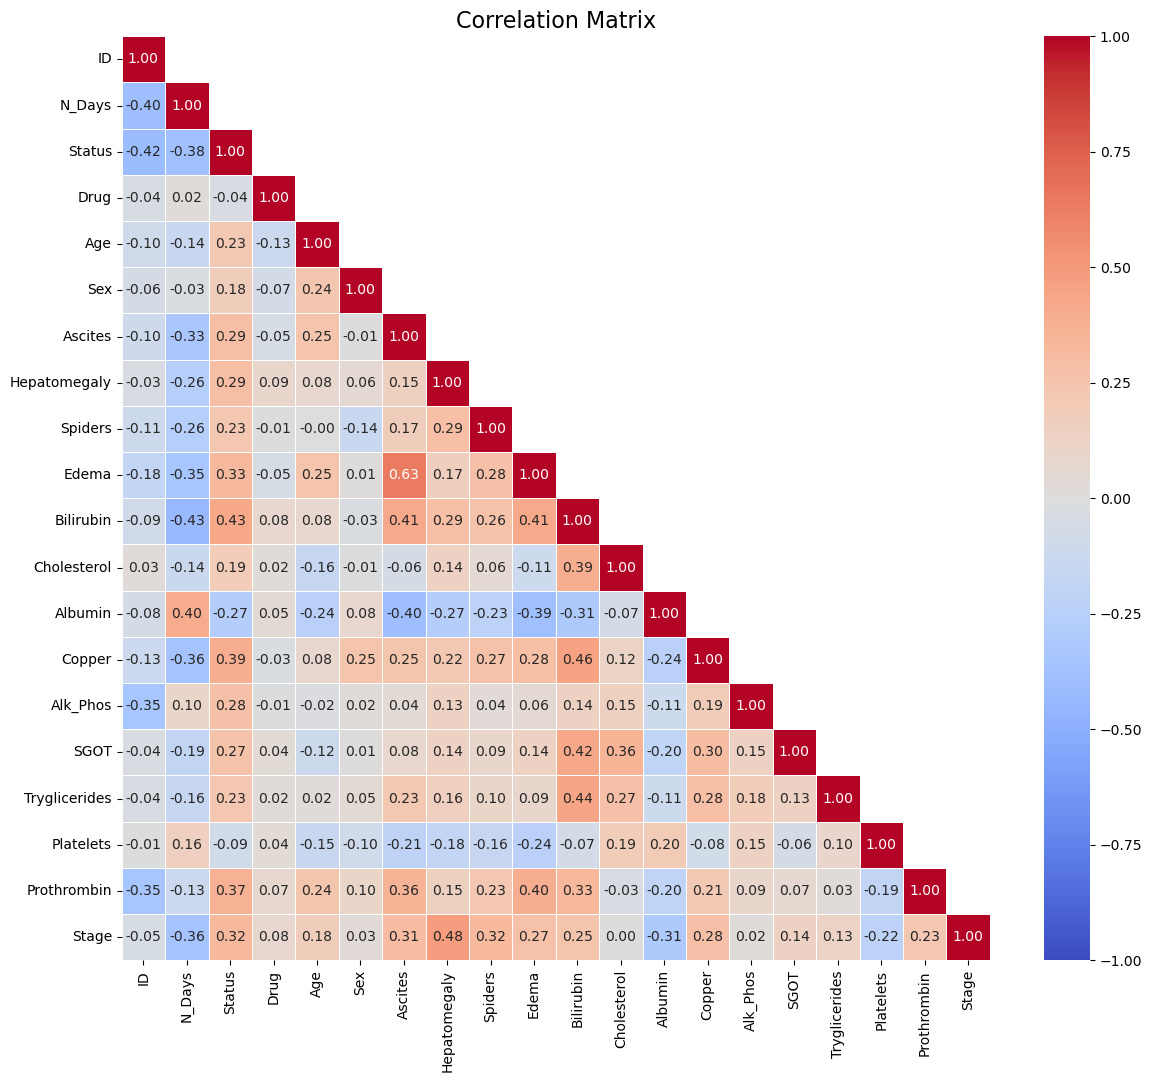

--- Top correlated features with stage ---
Hepatomegaly     0.479132
Status           0.321367
Spiders          0.316755
Ascites          0.306251
Copper           0.280346
Edema            0.272877
Bilirubin        0.247861
Prothrombin      0.233990
Age              0.178980
SGOT             0.142341
Tryglicerides    0.126033
Drug             0.080087
Sex              0.034206
Alk_Phos         0.016821
Cholesterol      0.004573
ID              -0.048347
Platelets       -0.221546
Albumin         -0.310473
N_Days          -0.363880 

No multicollinear pairs found above threshold 0.8.


In [12]:
# 1. Compute Correlation Matrix
# calculate pearson correlation coefficients for numerical features to identify linear relationships
corr_matrix = data_refined.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 12)) #set the plot

# create a mask to hide the upper triangle of the matrix to avoid visual redundancy while keeping the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# plot the heatmap with annotations and a coolwarm color map to visualize positive and negative correlations
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True,       # display the numeric correlation coefficients
            fmt=".2f",        # format to 2 decimal places
            cmap='coolwarm',  # colormap. red=positive correlation, blue=negative correlation
            vmin=-1, vmax=1,  # set fixed scale limits
            linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.savefig('../figures/01_corr_matrix.svg')
plt.show()

# --- DATA ANALYSIS PREPARATION ---
# create another strict mask that covers the upper triangle AND the diagonal (k=0). We have to do another because in this case we want delete also self-correlations (A-A) for the subsequent analysis
mask_without_selfcorr = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_masked = corr_matrix.mask(mask_without_selfcorr)

# extract and sort correlation values relative to the target variable 'Stage' to identify the most predictive features
print("--- Top correlated features with stage ---")
# Extract and sort the correlation values relative to the target 'Stage'. We use .drop('Stage') to remove the self-correlation entry
print(corr_masked.loc['Stage'].drop('Stage').sort_values(ascending=False).to_string(), '\n')

# define threshold for pearson's r indicating strong redundancy between features
multicoll_threshold = 0.8

# flatten the matrix into unique pairs to facilitate filtering
stacked_corr = corr_masked.stack()

# filter pairs where the absolute correlation exceeds the threshold to detect potential multicollinearity
high_corr_pairs = stacked_corr[stacked_corr.abs() > multicoll_threshold]

# print the multicollinearity report to decide on feature removal or combination
if len(high_corr_pairs) > 0:
    print(f"Out of {len(stacked_corr)} total pairs, {len(high_corr_pairs)} high correlations were found (> {multicoll_threshold}):")
    print(high_corr_pairs.to_string())
else:
    print(f"No multicollinear pairs found above threshold {multicoll_threshold}.")

### 2.3 Feature Analysis Strategy

The Correlation Matrix (Heatmap) revealed several strong predictors for the disease `Stage`. However, these features fall into two distinct data types, requiring different visualization techniques to assess their discriminative power:

1.  **Continuous Variables:** We will analyze these using **Boxplots** to observe shifts in medians and distributions across stages.
2.  **Categorical/Binary Variables:**  We will analyze these using **Bar Charts** to compare the frequency of symptoms across stages.

Below, we list the variables identified for each category before proceeding with the visual inspection.

In [13]:
relevant_feature=corr_masked.loc['Stage'].drop('Stage')# extract correlation values relative to the target variable 'Stage', excluding the target itself
relevant_threshold=0.2 # change this if you want be more stringent to select the most correlated features.
relevant_feature=relevant_feature[relevant_feature.abs()>relevant_threshold] # filter features that show a significant correlation (absolute value > 0.2) with the target

# separate selected features into numerical and categorical lists for specific visualization strategies
numerical_relevant_cols=[col for col in relevant_feature.index if col in numerical_cols]
categorical_relevant_cols=[col for col in relevant_feature.index if col in categorical_cols]


print(f'Relevant features upper the relevance threshold are: \n{relevant_feature.sort_values(ascending=False).to_string()}')

Relevant features upper the relevance threshold are: 
Hepatomegaly    0.479132
Status          0.321367
Spiders         0.316755
Ascites         0.306251
Copper          0.280346
Edema           0.272877
Bilirubin       0.247861
Prothrombin     0.233990
Platelets      -0.221546
Albumin        -0.310473
N_Days         -0.363880


In [14]:
#give a summary visualization of the most correlated features (numerical and categorical), divided by positive and negative correlations.
print(f'Relevant continuous variables are:')
relevant_numerical_feature=relevant_feature[numerical_relevant_cols]
print(f'Positive ones:\n{relevant_numerical_feature[relevant_numerical_feature>0].to_string()}')
print(f'\nNegative ones:\n{relevant_numerical_feature[relevant_numerical_feature<0].to_string()}')
relevant_categorical_feature=relevant_feature[categorical_relevant_cols]
print('-'*50)
print(f'Categorical embedded variables are:')
print(f'Positive ones:\n{relevant_categorical_feature[relevant_categorical_feature>0].to_string()}')
print(f'\nNegative ones:\n{relevant_categorical_feature[relevant_categorical_feature<0].to_string()}')

Relevant continuous variables are:
Positive ones:
Bilirubin      0.247861
Copper         0.280346
Prothrombin    0.233990

Negative ones:
N_Days      -0.363880
Albumin     -0.310473
Platelets   -0.221546
--------------------------------------------------
Categorical embedded variables are:
Positive ones:
Status          0.321367
Ascites         0.306251
Hepatomegaly    0.479132
Spiders         0.316755
Edema           0.272877

Negative ones:
Series([], )


#### 2.3.1 Feature Analysis: Continuous Predictors (Boxplots)

We proceed to visually inspect the distributions of the top-ranked **continuous** variables relative to the target `Stage`.

**Selection Criteria:**
Based on the Heatmap results, we focus on the features with the strongest Pearson correlation coefficients (that exceed the relevance threshold of **|r| > 0.2**).:
* **Positive Correlation (Risk Factors):** `Copper`, `Bilirubin`, `Prothrombin` (values tend to increase with severity).
* **Negative Correlation (Protective/Survival Factors):** `N_Days`, `Albumin`, `Platelets` (values tend to decrease with severity).

**Goal:**
We use **Boxplots** to observe if the **medians** and Interquartile Ranges (IQR) shift visibly as the disease progresses from Stage 1 to Stage 4.
* **What we look for:** A clear "staircase effect" (separation) between the stages. If the box for Stage 4 is distinct from Stage 1 (with minimal overlap), the feature has high discriminative power for the model.

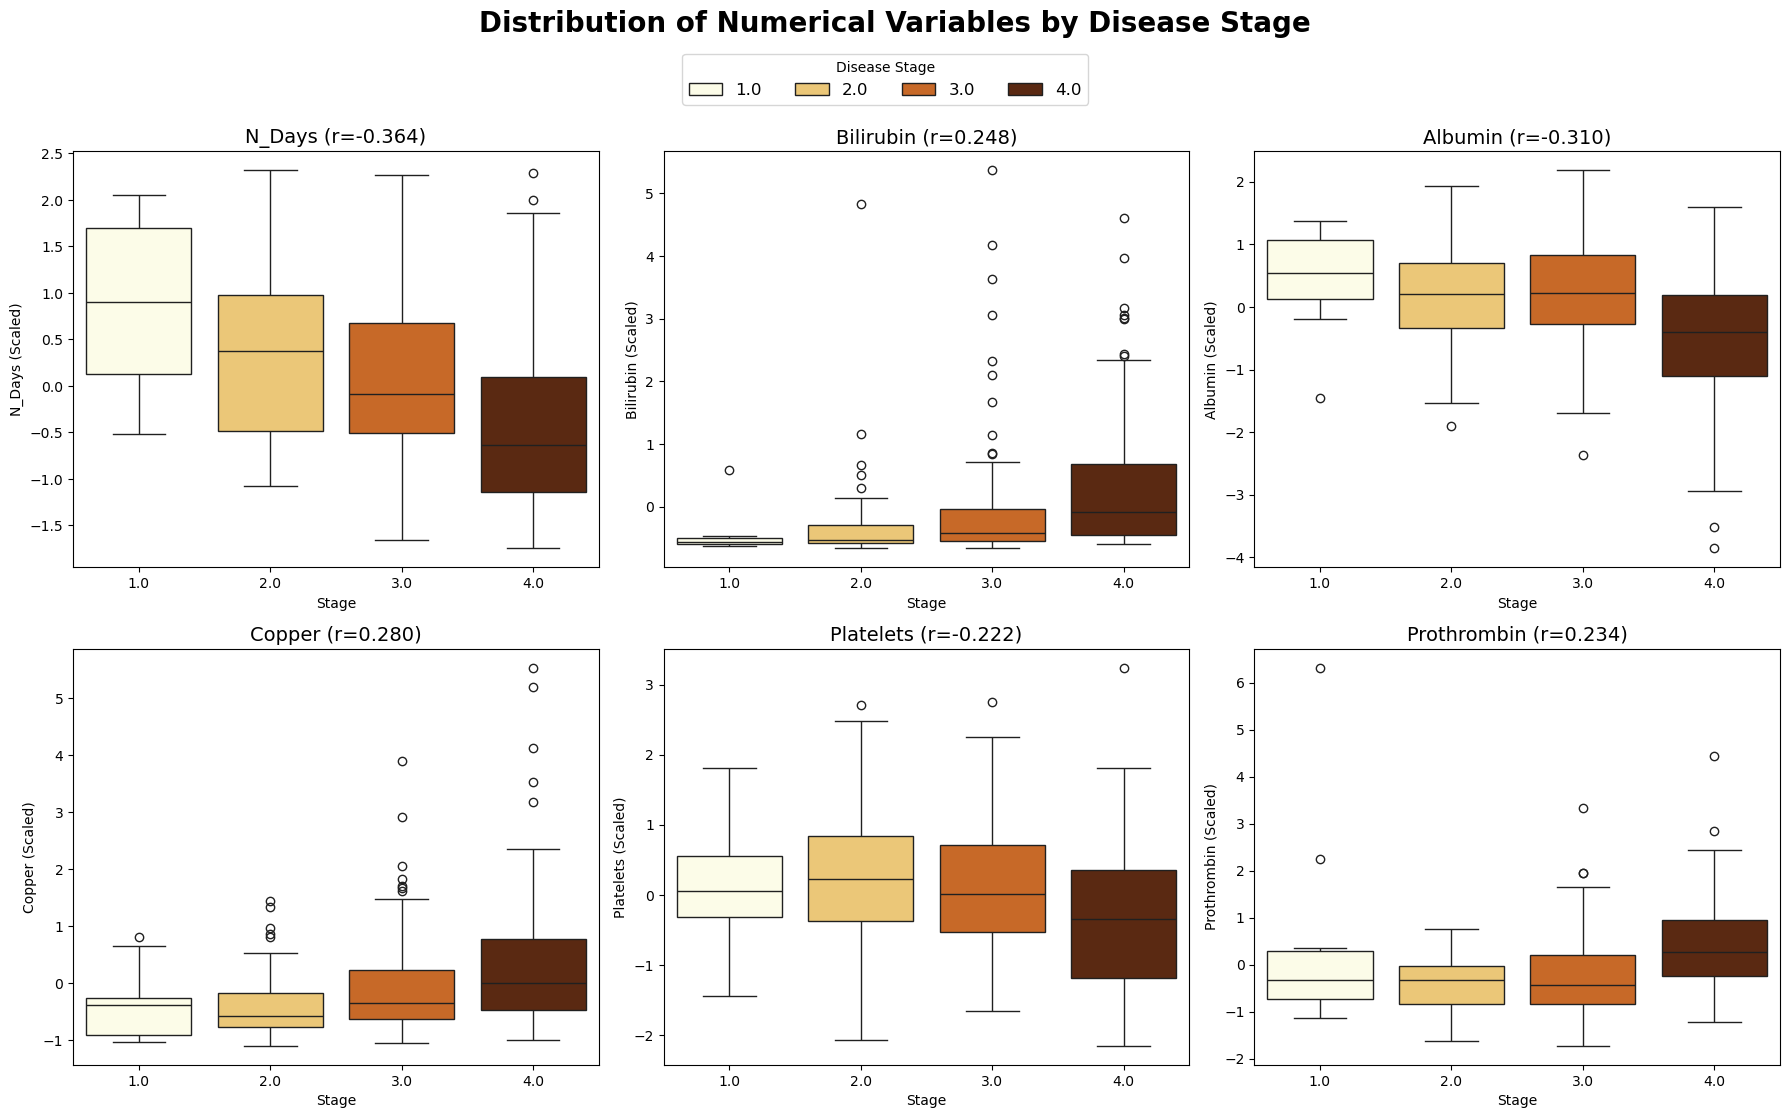

In [15]:
# setup the grid dimensions based on the number of features to plot
features_to_plot = numerical_relevant_cols
n_cols = 3
n_rows = len(features_to_plot)

# initialize the main figure with dynamic height calculation
plt.figure(figsize=(18, 5 * n_rows))
plt.suptitle("Distribution of Numerical Variables by Disease Stage", fontsize=20, weight='bold', y=1.02)# add a main title to the visualization
for i, feature in enumerate(features_to_plot):
    fig=plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Stage', y=feature, data=data_refined, hue='Stage', palette='YlOrBr')# generate boxplot to visualize distribution and outliers across stages
    
    plt.title(f'{feature} (r={relevant_numerical_feature[feature]:.3f})', fontsize=14)# set dynamic title including the correlation coefficient for immediate context.
    plt.xlabel('Stage')
    plt.ylabel(f'{feature} (Scaled)')
    fig.get_legend().remove() # remove individual legends to make possible print only one legend for all the graphs.
handles, labels = fig.get_legend_handles_labels() # extract legend handles and labels to use them globally 
plt.tight_layout()
fig.legend(handles, labels, ncol=4, title='Disease Stage', fontsize=12, bbox_to_anchor=(-0.3,2.45))
plt.savefig('../figures/01_dis_num_variables.svg')
plt.show()

Based on the visual analysis of the Box Plots and the calculation of medians per stage, the following observations for Feature Selection emerge:

1.  **Strong Signals:**
    * **Bilirubin and Copper:** These show a clear "staircase" effect. Median values increase progressively from Stage 1 to Stage 4, indicating a strong positive correlation with disease severity. These will be the most influential features for the model.
    * **N_Days:** Shows a very strong negative correlation. Patients in early stages remain in the study significantly longer than those in advanced stages. This is likely the single most predictive feature.

2.  **Features with Overlap:**
    * **Albumin:** Although it shows a general downward trend (useful for distinguishing healthy vs. severe cases), there is a **significant overlap between Stage 2 and Stage 3**, where the median remains almost constant (or rises slightly). The implication is that we expect the classifier to distinguish extreme stages (1 and 4) very well, but it might make misclassification errors when distinguishing between Stage 2 and Stage 3 due to this grey area in the data.


### 2.3.2 Feature Analysis: Categorical Predictors (Bar Charts)

We verify the impact of the **categorical/discrete** variables that exceeded the relevance threshold of **|r| > 0.2** (**Hepatomegaly, Status, Spiders, Ascites, Edema**)

Given the significant disparity in sample sizes between stages (e.g., Stage 1: ~12 patients vs Stage 3: ~111 patients), comparing absolute counts (standard Countplots) would be misleading, as the majority class would visually dominate every chart. Therefore, we adopted the following strategy:
We use Bar Plots to visualize Relative Frequencies (Percentages) calculated within each stage.  This normalization allows for a fair comparison of symptom prevalence (risk) independent of the group size.

**What we look for:** 
A clear **"Distribution Shift"**: We expect to see that the percentage of patients presenting a specific symptom (e.g., Hepatomegaly = Y) increases progressively with the Disease Stage.

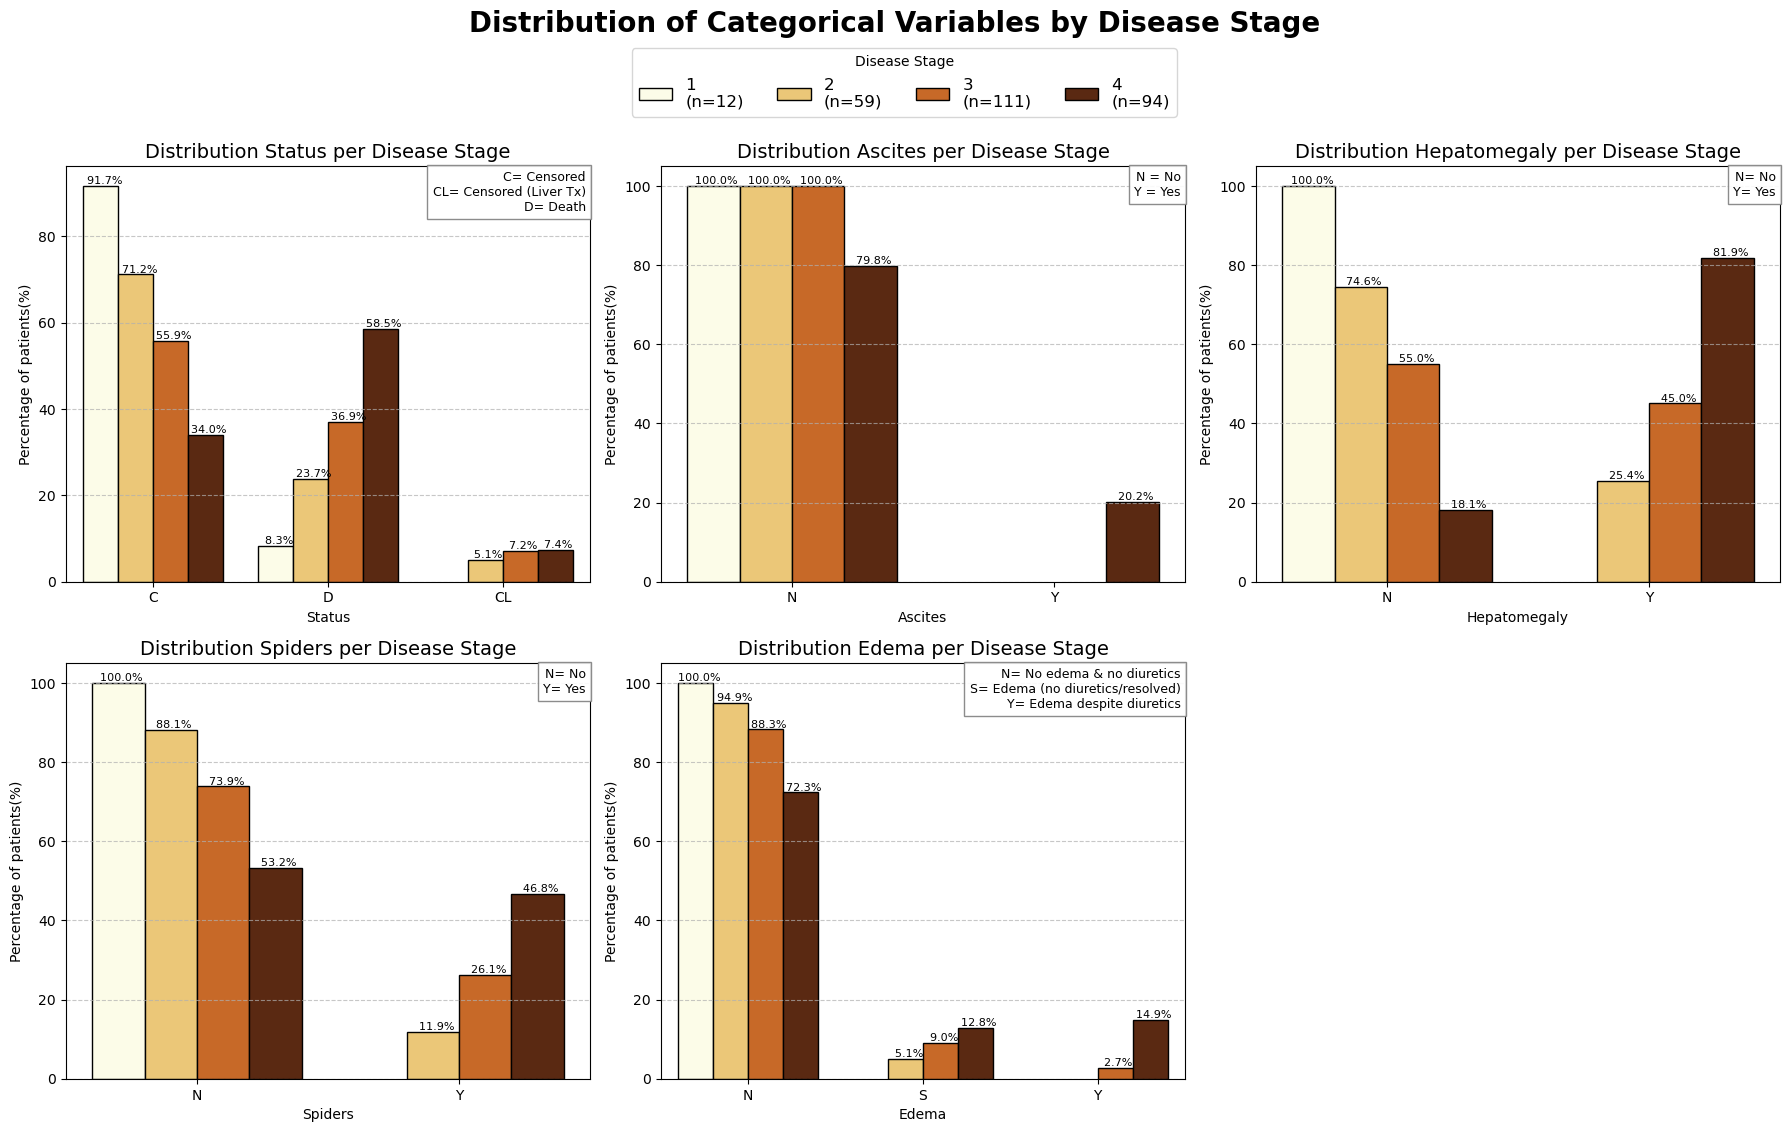

In [16]:
# define categorical features to visualize based on previous selection
features_to_plot = categorical_relevant_cols

# create a glossary to map encoded values back to clinical descriptions for better readability
glossary = {
    'Ascites': "N = No\nY = Yes",
    'Hepatomegaly': "N= No\nY= Yes",
    'Spiders': "N= No\nY= Yes",
    'Edema': "N= No edema & no diuretics\nS= Edema (no diuretics/resolved)\nY= Edema despite diuretics",
    'Status': "C= Censored\nCL= Censored (Liver Tx)\nD= Death",
    'Sex': "F= Female\nM= Male",
    'Drug': "D-pen= D-penicillamine\nP= Placebo"
}

# prepare labels with sample sizes for the legend using a temporary clean dataframe to ensure the correct labeling
stage_counts = data.dropna()['Stage'].value_counts().sort_index()
stage_labels = [f"{int(stage)}\n(n={count})" for stage, count in stage_counts.items()]

# setup dynamic grid layout based on number of columns
n_cols = 3
n_rows = len(features_to_plot)

# initialize figure with dynamic height
plt.figure(figsize=(18, 5 * n_rows))
plt.suptitle("Distribution of Categorical Variables by Disease Stage", fontsize=20, weight='bold', y=1.03)
for i, feature in enumerate(features_to_plot):
    fig = plt.subplot(n_rows, n_cols, i + 1)
    props = (data.dropna().groupby(['Stage'])[feature].value_counts(normalize=True).rename('percent').mul(100).reset_index())# calculate relative percentages within each stage to normalize class imbalance
    sns.barplot(x=feature, y='percent', hue='Stage', data=props, palette='YlOrBr', edgecolor='black', ax=fig)# plot bar chart representing percentages
    for container in fig.containers:# add precise percentage labels on top of bars
            fig.bar_label(container, fontsize=8, fmt='  %.1f%%')
        
    plt.grid(axis = 'y', linestyle='--', alpha=0.7) #add horizontal grid lines
    plt.title(f'Distribution {feature} per Disease Stage', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel(f'Percentage of patients(%)')
    fig.get_legend().remove()    #remove the small legend inside each plot (we want only one for the entire figure)
    
    #create and add an handmade legend that describe the meaning of the classes for each categorical feature. 
    if feature in glossary:
        fig.text(0.992, .989, glossary[feature], 
                transform=fig.transAxes,  # Usa coordinate relative (0-1)
                ha='right', va='top',    # Allineamento
                fontsize=9,
                bbox=dict(fc="white", ec="gray", alpha=0.9)) # Sfondo bianco

handles, labels = fig.get_legend_handles_labels()
plt.tight_layout()
fig.legend(handles, stage_labels, ncol=4, title='Disease Stage', fontsize=12, bbox_to_anchor=(1,2.5))
plt.savefig('../figures/01_dis_cat_variables.svg')
plt.show()




Given the significant disparity in sample sizes between stages (e.g., **Stage 1: ~12 patients** vs **Stage 3: ~111 patients**), comparing absolute counts would be misleading, as the majority class would visually dominate every chart.
Therefore, we chose to analyze **Relative Frequencies (Percentages)** calculated within each stage. This normalization allows for a fair comparison of symptom prevalence (risk) independent of the group size.
The analysis of relative frequencies (percentages within each stage) reveals distinct clinical patterns regarding disease progression.

**1. The "Asymptomatic" Stage 1**
* **Zero Incidence:** Across all physical markers (Ascites, Hepatomegaly, Spiders, Edema), Stage 1 patients show **0.0% prevalence**.
* **Model Implication:** This confirms that Stage 1 is physically asymptomatic in this dataset. The presence of *any* of these signs is a definitive exclusion criterion for Stage 1.

**2. High Specificity Markers for Stage 4 (Ascites)** Ascites is an exclusive marker for Stage 4 in this filtered dataset.
    * **Stages 1-3:** 0.0% prevalence.
    * **Stage 4:** **20.2%** prevalence.
* **Interpretation:** While Ascites has low sensitivity (only ~20% of Stage 4 patients have it), it has **100% specificity** in this sample: if a patient presents Ascites, they are almost certainly in Stage 4.

**3. Progressive Indicators (Hepatomegaly & Spiders)**
Hepatomegaly is the strongest indicator of linear progression, showing a doubling pattern across stages:
* **Stage 1:** 0.0%
* **Stage 2:** ~25.4%
* **Stage 3:** ~45.0%
* **Stage 4:** Peaks at **81.9%**.
* **Model Implication:** Unlike Ascites (which only flags Stage 4), Hepatomegaly is crucial for differentiating the intermediate stages (2 vs 3). Higher stages have more probability to manifest Hepatomegaly.**Spiders** show a similar, though less aggressive, progressive trend (rising from 0% to 46.8%).

**4. Outcome Correlation (Status)**
Mortality rates correlate perfectly with histological staging, validating the target variable:
* **Stage 1:** ~8.3% mortality.
* **Stage 3:** ~36.9% mortality.
* **Stage 2:** ~23.7% mortality.
* **Stage 4:** Spikes to **58.5%** mortality.
* **Note on Transplants (CL):** Liver Transplantation cases are absent in Stage 1 (0%) but maintain a consistent presence across Stages 2, 3, and 4 (ranging between ~5% and ~7.5%), indicating that surgical intervention becomes a constant possibility once the disease progresses beyond the onset phase.

**5. Edema Nuance ('S' vs 'Y'):**
While severe Edema ('Y') follows the Ascites pattern (clustering in Stage 4), indicating a condition difficult to resolve despite diuretics, the **'S' category (Edema resolved)** acts as a transitional marker. It appears earlier, rising gently from Stage 2 (5%) to Stage 4 (12.7%).
This suggests that a small portion of Stage 2 and 3 patients may present fluid retention, but it remains manageable and responsive to diuretics drugs. In contrast, the prognosis for Stage 4 is **more uncertain**: the population splits between those who still respond to treatment ('S') and those who develop resistant edema ('Y').

### 2.3.2 Feature Analysis: Summary & ML Implications

Based on the visual analysis (Bar Plots) and the calculation of proportional prevalence per stage, the following observations for Feature Selection emerge:

**1. Critical Separator (The "Middle" Solver)**
* **Feature:** `Hepatomegaly`
* **Observation:** This is the most valuable categorical feature for solving the "classification grey area". While numerical features like *Albumin* struggle to distinguish between **Stage 2 and Stage 3**, Hepatomegaly becomes the decisive factor here, as its prevalence nearly doubles (~25% vs ~45%) between these two stages.
* **Verdict:** **Keep (High Priority).** Essential for separating intermediate classes where biomarkers might overlap.

**2. High Purity Markers (Stage 4 Targets)**
* **Features:** `Ascites` and `Edema` (specifically 'Y' class).
* **Observation:** These features provide high **Information Gain** regarding Stage 4. They act as "Red Flags": their presence is almost exclusively linked to the final stage. In a Decision Tree context, these variables will likely create "pure leaf nodes" that classify Stage 4 patients with very high precision.
* **Verdict:** **Keep.** They guarantee high specificity for the most critical class.

**3. Exclusion Logic (Stage 1 Definition)**
* **Features:** *All Categoricals (Ascites, Hepatomegaly, Spiders, Edema).*
* **Observation:** Collectively, they define a strong exclusion rule. This allows the classifier to quickly filter out healthy patients before evaluating continuous biomarkers.
* **Verdict:** **Keep.** They define the baseline "healthy" state.

**4. Potential Redundancy (Robustness Check)**
* **Feature:** `Spiders`
* **Observation:** This feature follows a very similar trend to *Hepatomegaly* but with slightly weaker signals (lower percentages). In a strict dimensionality reduction scenario, this would be the candidate to drop because it adds less unique information compared to Hepatomegaly.
* **Verdict:** **Keep for Robustness.** Even if correlated with Hepatomegaly, it provides reinforcement (ensemble models like Random Forest benefit from correlated features to reduce variance). We will retain it unless the model shows signs of overfitting.

## 3. Saving the Refined Dataset

In [17]:
data_refined.to_csv('../data/dataset_refined.csv', index=False)